# Singular Value Decomposition

## Dependency

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

## Singular value decomposition (SVD)

SVD is similar to Eigendecomposition, but SVD is more general because it works on a rectangular matrix as well as a square matrix. Eigendecomposition only works for a square matrix. There are ways to think. Think eigendecomposition is a special case of SVD. Or think SVD is an extension of eigendecomposition.

- $A A^T$ and $A^T A$ produce a square symmetric matrix
- $C(A A^T) = C(A)$, column space of $A$
- $R(A^T A) = R(A)$, row space of $A$

### Big picture

The goal of SVD is to decompose a given matrix $A$ into 3 matrices.

$$
A = U \Sigma V^T
$$

$A$ is a given matrix, mxn

$U$ is a **orthogonal matrix, orthogonal basis for column space** of $A$, mxm. $U$ is called **left singular vectors**.

$\Sigma$ is a **diagonal matirx with singular values** of $A$ on diagonal elements, mxn

$V^T$ is a **orthogonal matrix, orthogonal basis for row space** of $A$, nxn. $V^T$ is called **right singular vectors**.

It looks like a **diagonalization** that eigendecomposition produces, $A = V \Lambda V^{-1} = V \Lambda V^T$

When $A$ is a square symmetric matrix, $U = V$.

### How to compute $V$ in SVD

Start from the SVD equation and **left-multiply it by $A^T$**

$$
A = U \Sigma V^T
$$
$$
A^T A = (U \Sigma V^T)^T U \Sigma V^T
$$

By **LIVE EVIL rule**,

$$
A^T A = V^{TT} \Sigma^T U^T U \Sigma V^T
$$

Becuase $U$ is an **orthogonal matrix**, it means that $U^T = U^{-1}$

$$
A^T A = V^{TT} \Sigma^T U^{-1} U \Sigma V^T
$$

Because $A^{-1} A = I$,

$$
A^T A = V^{TT} \Sigma^T I \Sigma V^T
$$

Because a transpose of a transposed matrix goes back to the original matrix,

$$
A^T A = V \Sigma^T \Sigma V^T
$$

Because $\Sigma$ is a **diagonal matrix**, $\Sigma^T = \Sigma$, and powers of a diagonal matrix is powers of each diagonal element in a matrix,

$$
A^T A = V \Sigma^2 V^T
$$

Because $A^T A$ is a square, this equation can be read as **eigendecomposition** of $A^T A$. So $V$ is **eigenvector** of $A^T A$ and $\Sigma^2$ is **eigenvalue** of $A^T A$.

### How to compute $U$ in SVD

Start from the SVD equation and **right-multiply it by $A^T$**

$$
A = U \Sigma V^T
$$
$$
A A^T = U \Sigma V^T (U \Sigma V^T)^T
$$
$$
A A^T = U \Sigma V^T V^{TT} \Sigma^T U^T
$$
$$
A A^T = U \Sigma V^T V \Sigma^T U^T
$$
$$
A A^T = U \Sigma V^{-1} V \Sigma^T U^T
$$
$$
A A^T = U \Sigma I \Sigma^T U^T
$$
$$
A A^T = U \Sigma \Sigma^T U^T
$$
$$
A A^T = U \Sigma \Sigma U^T
$$
$$
A A^T = U \Sigma^2 U^T
$$

So to compute $U$, apply **eigendecomposition** to $A A^T$, and the **eigenvector** is $U$.

$U$ can be also computed by **eigendecomposition** of $A^T A$, getting $V$ and $\Sigma^2$, and use the following formula. Going back to SVD formula,

$$
A = U \Sigma V^T
$$

Right-multiply it by $V$

$$
A V = U \Sigma V^T V
$$

Because $V$ is an orthogonal matrix, $V^T = V^{-1}$

$$
A V = U \Sigma V^{-1} V
$$

Because $V^{-1} V = I$

$$
A V = U \Sigma I
$$
$$
A V = U \Sigma
$$

By looking at each vector and value $v_i, u_i, \sigma_i$ in $V, U, \Sigma$,

$$
A v_i = u_i \sigma_i
$$
$$
u_i \sigma_i = A v_i
$$
$$
u_i = (A v_i) / \sigma_i
$$

So after getting $v_i$ and $\sigma_i$ by eigendecomposition of $A^T A$, compute $u_i$.

### How to interpret singular values in $\Sigma$

**Singular values** are scale-dependent, meaning you cannot compare singular values from one matrix with singular values from another matrix by the magnitudes of each singular value, because the scale of the singular values depend on the numbers in the two matrices. When you scale up the matrix to be applied SVD, singular values are also scaled up by the same amount. $U$ and $V$ stay intact, because both are kept being normalized.

Singular values will be interpretable after normalizing it. So singular values will be percentage.

1. Sum all the singular values
2. Divide each singular value by the sum

So after SVD, you get multiple singular values, and normalize them. When you take the maximum of the normalized singular value, if the max is high, we can interpret that the given matrix is simple, but if the max is low, the matrix is complicated made by lots of information, distributed along different directions.

In [49]:
A = np.random.randn(2, 2)

print(f'Singular values: {np.linalg.svd(A)[1]}')
print('U')
print(np.linalg.svd(A)[0])
print()
print(f'Singular values after scaling up: {np.linalg.svd(A * 10)[1]}')
print('U after scaling up')
print(np.linalg.svd(A * 10)[0])
print()

Singular values: [3.21872585 0.88497888]
U
[[-0.90380915 -0.42793576]
 [-0.42793576  0.90380915]]

Singular values after scaling up: [32.18725846  8.84978881]
U after scaling up
[[-0.90380915 -0.42793576]
 [-0.42793576  0.90380915]]



## Example to compute $U$ by eigendecomposition of $A^T A$

In [39]:
np.random.seed(1)

m = 3
n = 6
A = np.random.randn(m, n)

# SVD
U_svd, S, V_svd = np.linalg.svd(A)

print('U')
print(np.round(U_svd, 1))
print()
print('Sigma')
print(np.round(S, 1))
print()
print('V')
print(np.round(V_svd.T, 1))
print()

# Eigendecomposition
L, V_eig = np.linalg.eig(A.T @ A)

# Sort eigenvalue and eigenvector in descending eigenvalue order
sidx = np.argsort(L)[::-1]
L = L[sidx]
V_eig = V_eig[:, sidx]

print('Eigenvalue')
print(np.round(L, 1))
print()
print('Eigenvector')
print(np.round(V_eig, 1))
print()

# Confirm V svd == V eig
print('V svd - V eig')
print(np.round(V_svd.T - V_eig, 1))
print('First 3 columns are actual columns of the matrix, and the last 3 columns are the null space of the matrix')
print('They are in the same space, but the basis vectors are different after passing the rank of the matrix')
print(f'Rank of the matrix A^T A: {np.linalg.matrix_rank(A.T @ A)}')
print()

# Compare singular value and eigenvalue
print('Eigenvalue')
print(np.round(L, 1))
print('Singular value^2')
print(np.round(S**2, 1))
print()

# Compute U from eigenvalue and eigenvector of eigendecomposition of A^T A
U_eig = np.zeros((m, m))
for i in range(m):
    U_eig[:, i] = (A @ V_eig[:, i].T) / np.sqrt(L[i])

print('U computed by eigenvalue and eigenvector of eigendecomposition of A^T A')
print(np.round(U_eig, 1))
print()
print('U_svd - U_eig')
print(np.round(U_svd - U_eig, 1))
print()

U
[[-0.7  0.1  0.7]
 [-0.7  0.2 -0.7]
 [-0.2 -1.  -0.1]]

Sigma
[4.5 1.7 1. ]

V
[[-0.5  0.4 -0.1  0.2 -0.3  0.6]
 [ 0.2  0.1  0.1  0.7  0.6  0.1]
 [-0.  -0.6 -0.7  0.2 -0.1  0.2]
 [ 0.2  0.5 -0.5  0.3 -0.3 -0.4]
 [-0.4  0.3 -0.4 -0.4  0.7 -0. ]
 [ 0.7  0.2 -0.1 -0.4  0.   0.6]]

Eigenvalue
[20.2  3.1  0.9  0.  -0.  -0. ]

Eigenvector
[[-0.5  0.4 -0.1  0.1  0.1  0.7]
 [ 0.2  0.1  0.1 -0.8 -0.7  0.4]
 [-0.  -0.6 -0.7 -0.1 -0.1  0.3]
 [ 0.2  0.5 -0.5  0.3 -0.4 -0.2]
 [-0.4  0.3 -0.4 -0.5  0.3 -0.3]
 [ 0.7  0.2 -0.1 -0.   0.5  0.3]]

V svd - V eig
[[ 0.   0.  -0.   0.1 -0.4 -0.1]
 [ 0.   0.   0.   1.6  1.3 -0.3]
 [-0.   0.  -0.   0.3  0.1 -0.1]
 [-0.  -0.   0.  -0.   0.1 -0.2]
 [-0.   0.   0.   0.1  0.4  0.3]
 [ 0.   0.  -0.  -0.3 -0.5  0.2]]
First 3 columns are actual columns of the matrix, and the last 3 columns are the null space of the matrix
They are in the same space, but the basis vectors are different after passing the rank of the matrix
Rank of the matrix A^T A: 3

Eigenvalue
[20

## Relationship between SVD and Eigendecomposition for a square symmetric matrix

We use square matrix because Eigendecomposition is only for square matrix and we want to compare SVD and Eigendecomposition.

For a symmetric matrix, SVD and Eigendecomposition produce the **same result**, except there could be sign flip in eigenvectors.

A
[[ 3.  -0.3  0.9 -2.9 -0.2]
 [-0.3  1.5 -0.4 -1.2  0.7]
 [ 0.9 -0.4  3.3 -2.1 -0.7]
 [-2.9 -1.2 -2.1 10.   4. ]
 [-0.2  0.7 -0.7  4.   4.8]]

Eigenvalue: L
[13.4  0.1  2.2  3.8  3.1]

Eigenvector: W
[[-0.3  0.4  0.7  0.5  0.1]
 [-0.   0.7 -0.5  0.2 -0.5]
 [-0.2  0.1 -0.5  0.3  0.8]
 [ 0.8  0.4  0.1 -0.1  0.3]
 [ 0.4 -0.4 -0.1  0.8 -0.2]]

Left singular vector: U
[[-0.3  0.5  0.1 -0.7 -0.4]
 [-0.   0.2 -0.5  0.5 -0.7]
 [-0.2  0.3  0.8  0.5 -0.1]
 [ 0.8 -0.1  0.3 -0.1 -0.4]
 [ 0.4  0.8 -0.2  0.1  0.4]]

Singular values: S
[13.4  3.8  3.1  2.2  0.1]

Right singular vector: V
[[-0.3 -0.  -0.2  0.8  0.4]
 [ 0.5  0.2  0.3 -0.1  0.8]
 [ 0.1 -0.5  0.8  0.3 -0.2]
 [-0.7  0.5  0.5 -0.1  0.1]
 [-0.4 -0.7 -0.1 -0.4  0.4]]

np.argsort(L): [4 3 2 1 0]
sidx: [0 3 4 2 1]



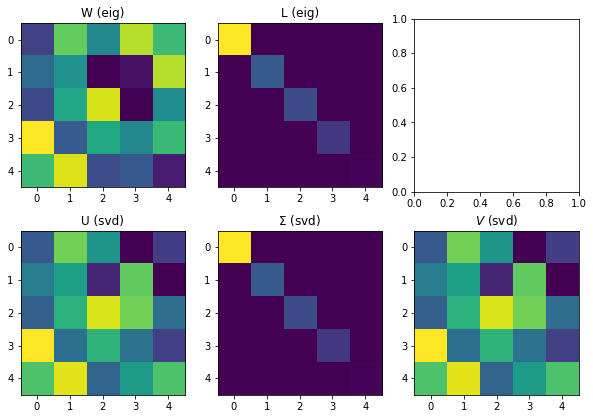

W - U
[[-0.   0.  -0.   1.4  0.8]
 [ 0.   0.  -0.  -0.9  1.4]
 [-0.   0.  -0.  -1.   0.3]
 [-0.  -0.  -0.   0.2  0.8]
 [ 0.  -0.  -0.  -0.3 -0.8]]

W + U
[[-0.5  1.   0.2 -0.  -0. ]
 [-0.1  0.3 -1.1  0.  -0. ]
 [-0.4  0.6  1.5  0.   0. ]
 [ 1.7 -0.3  0.6  0.   0. ]
 [ 0.8  1.5 -0.4 -0.  -0. ]]

U - V
[[-0.  0.  0. -0.  0.]
 [ 0. -0. -0. -0. -0.]
 [-0.  0.  0.  0.  0.]
 [-0.  0.  0. -0.  0.]
 [-0.  0. -0.  0.  0.]]

L - Sigma
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]



In [26]:
# Make a square symmetric matrix
A = np.random.randn(5, 5)
A = A.T @ A

print('A')
print(np.round(A, 1))
print()

# Compute eigendecomposition and singular value decomposition
# L: eigenvalue, W: eigenvector
L, W = np.linalg.eig(A)
# V: right singular vectors
U, S, V = np.linalg.svd(A)

print('Eigenvalue: L')
print(np.round(L, 1))
print()
print('Eigenvector: W')
print(np.round(W, 1))
print()

print('Left singular vector: U')
print(np.round(U, 1))
print()
print('Singular values: S')
print(np.round(S, 1))
print()
print('Right singular vector: V')
print(np.round(V, 1))
print()

# Sort eigen outputs by descending order
# np.argsort(L) returns a list of indices in ascending order by the value of the list
sidx = np.argsort(L)[::-1]
L = L[sidx]
W = W[:, sidx]

print(f'np.argsort(L): {np.argsort(L)}')
print(f'sidx: {sidx}')
print()

# Visualize
fig, ax = plt.subplots(2, 3, figsize=(10, 7))

# Eigendecomposition
ax[0, 0].imshow(W)
ax[0, 0].set_title('W (eig)')
ax[0, 1].imshow(np.diag(L))
ax[0, 1].set_title('L (eig)')

# SVD
ax[1, 0].imshow(U)
ax[1, 0].set_title('U (svd)')
ax[1, 1].imshow(np.diag(S))
ax[1, 1].set_title('$\Sigma$ (svd)')
ax[1, 2].imshow(V.T)
ax[1, 2].set_title('$V$ (svd)')

plt.show()

print('W - U')
print(np.round(W - U, 1))
print()

print('W + U')
print(np.round(W + U, 1))
print()

print('U - V')
print(np.round(U - V.T, 1))
print()

print('L - Sigma')
print(np.round(np.diag(L) - np.diag(S), 1))
print()

## Relationship between singular value and eigenvalue

For symmetric matrix, singular value and eigenvalue are the same, but non-symmetric square matrix, singular value and eigevalue are not the same.
1. Eigenvalue of $A^T A$ = (Singular value of $A$)$^2$ (where $A^T A$ is a square symmetric matrix)
2. Eigenvalue of $A^T A$ = Singular value of $A^T A$ (where $A^T A$ is a square symmetric matrix)
3. Eigenvalue of $A$ $\neq$ Singular value of $A$ (where $A$ is a square matrix)

In [35]:
# 1.
A = np.array([
    [3, 1, 0],
    [1, 1, 0]
])

print('Eigenvalue')
print(np.sort(np.linalg.eig(A.T @ A)[0]))
print('Singular value')
print(np.sort(np.linalg.svd(A)[1])**2)
print()

# 2.
print('Eigenvalue')
print(np.sort(np.linalg.eig(A.T @ A)[0]))
print('Singular value')
print(np.sort(np.linalg.svd(A.T @ A)[1]))
print()

# 3a, real-value
A = np.array([
    [3, 1, 0],
    [1, 1, 0],
    [1, 1, 1]
])
print('Eigenvalue')
print(np.sort(np.linalg.eig(A)[0]))
print('Singular value')
print(np.sort(np.linalg.svd(A)[1]))
print()

# 3b, complex-value
A = np.random.randn(3, 3)
print('Eigenvalue')
print(np.sort(np.linalg.eig(A)[0]))
print('Singular value')
print(np.sort(np.linalg.svd(A)[1]))
print()

Eigenvalue
[ 0.          0.34314575 11.65685425]
Singular value
[ 0.34314575 11.65685425]

Eigenvalue
[ 0.          0.34314575 11.65685425]
Singular value
[ 0.          0.34314575 11.65685425]

Eigenvalue
[0.58578644 1.         3.41421356]
Singular value
[0.49384652 1.10038368 3.68039011]

Eigenvalue
[-1.26888207+0.j         -0.1939345 -1.31828408j -0.1939345 +1.31828408j]
Singular value
[0.47939343 1.55934301 3.01372882]



## Relationship between $A^T A$ and $A A^T$

- If $u$ is a **left singular vector** of $A^T A$, and if $\sigma$ is the corresponding singular value, $A v$ is a **right singular value** of $A A^T$ with the same $\sigma$.
- If $u$ is a **left singular vector** of $A A^T$, and if $\sigma$ is the corresponsing singular value, $A^T v$ is a **right singular value** of $A^T A$ with the same $\sigma$.

Start from SVD equation,

$$
A^T A = U \Sigma V^T
$$

By focusing on a single vector and value, and just think about $A^T A$ will be made by layers

$$
A^T A = u \sigma v^T
$$

Right-multiply both sides with $v$

$$
A^T A v = u \sigma v^t v
$$

Because $v$ is a vector in an orthogonal matrix $V$

$$
A^T A v = u \sigma 1
$$

$$
A^T A v = u \sigma
$$

When we are given $A^T A$, it's a square symmetric matrix. In that case, SVD of the square symmetric matrix produces the same $U$ and $V$.

$$
A^T A v = v \sigma
$$

Left-multiply both sides by $A$

$$
A A^T A v = A v \sigma
$$

Replace $A v$ with $w$

$$
A A^T w = w \sigma
$$
$$
A A^T w = \sigma w
$$

This equation is **eigendecomposition** with **eigenvalue** $\sigma$ and **eigenvector** $w$, so $A v$ is a right singular value of $A A^T$

In [2]:
m = 4

A = np.random.randn(m, m)
AtA = A.T @ A
AAt = A @ A.T

U, S, V = np.linalg.svd(AtA)

diffs = np.zeros(m)
for i in range(m):
    
    left = AAt @ A @ U[:, i]
    right = A @ U[:, i] * S[i]
    
    diffs[i] = sum(left - right)
    
print(np.round(diffs, 1))

[-0.  0.  0.  0.]


## Spectral theory by SVD
- Theory about using eigenvalue and eigenvector

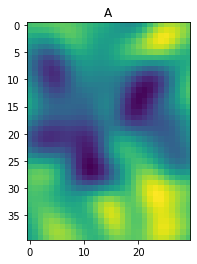

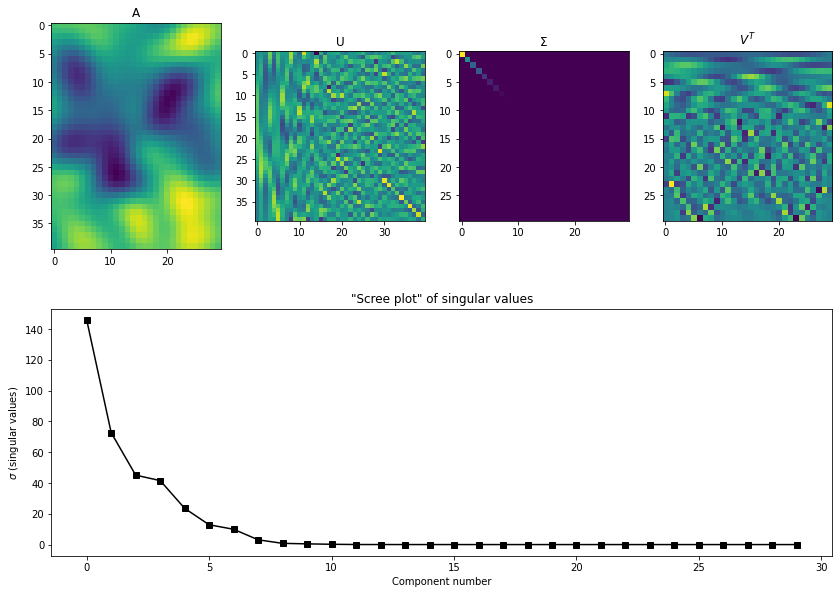

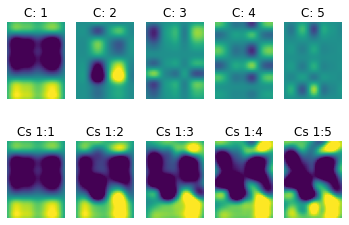

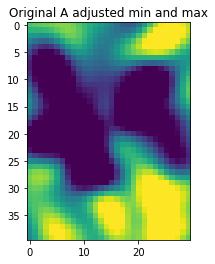

In [29]:
np.random.seed(0)

# Make a give matrix by smooth noise image
m = 40
n = 30
# No need to care about the below math detail for SVD
k = int((m + n) / 4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
g2d = np.exp(-(X**2 + Y**2) / (k / 8))
A = scipy.signal.convolve2d(np.random.randn(m, n), g2d, 'same')

plt.imshow(A)
plt.title('A')
plt.show()

# SVD
U, S, V = np.linalg.svd(A)

# Visualize
fig = plt.subplots(1, figsize=(14, 10))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('$V^T$')

plt.subplot(212)
plt.plot(S, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (singular values)')
plt.title('"Scree plot" of singular values')

plt.show()

# Approximate the given matrix A by layers
k = 5
rank1mats = np.zeros((k, m, n))

for i in range(k):
    
    # Create rank 1 matrix by outer production of single singular vector and singule singular value
    rank1mats[i, :, :] = np.outer(U[:, i] * S[i], V[i, :])
    
    # Each layer
    plt.subplot2grid((2, k), (0, i))
    plt.imshow(rank1mats[i, :, :], vmin=-5, vmax=5)
    plt.axis('off')
    plt.title(f'C: {i + 1}')
    
    # Cumulative sum of layers
    plt.subplot2grid((2, k), (1, i))
    imdat = np.sum(rank1mats[:i + 1, :, :], axis=0)
    plt.imshow(imdat, vmin=-5, vmax=5)
    plt.axis('off')
    plt.title(f'Cs 1:{i + 1}')
    
plt.show()

plt.imshow(A, vmin=-5, vmax=5)
plt.title('Original A adjusted min and max')
plt.show()

## Low-rank approximation by SVD

The original SVD equation is below

$$
A = U \Sigma V^T
$$
$$
(m \times n) = (m \times m) (m \times n) (n \times n)
$$

Low-rank approximation is to only use a part of singular vectors and singular values (from 1st vector or value to **k**th vector and value) to recontruct the original matrix. Hopefully we reduce lots of data, but don't lose the information (or meaning) of the data.

$$
A = U \Sigma V^T
$$
$$
(m \times n) = (m \times k) (k \times k) (k \times n)
$$

So after reducing the size of matrices from SVD, still apply matrix multiplication to approximate the original matrix.

Original matrix
A: (40, 30)

SVD
U: (40, 40)
S: (30,)
V: (30, 30)

Reduced matrix
Ur: (40, 5)
Sr: (5,)
Vr: (5, 30)

Low-rank approximated matrix
reconImage: (40, 30)

Reconstructed matrix rank: 5
Original matrix rank: 30



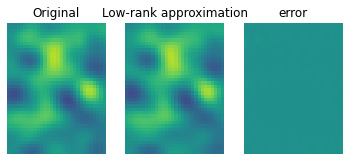

In [40]:
np.random.seed(1)

# Make a give matrix by smooth noise image
m = 40
n = 30
# No need to care about the below math detail for SVD
k = int((m + n) / 4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
g2d = np.exp(-(X**2 + Y**2) / (k / 8))
A = scipy.signal.convolve2d(np.random.randn(m, n), g2d, 'same')

print('Original matrix')
print(f'A: {A.shape}')
print()

# SVD
U, S, V = np.linalg.svd(A)

print('SVD')
print(f'U: {U.shape}')
print(f'S: {S.shape}')
print(f'V: {V.shape}')
print()

# Number of components
nComps = 5

# Reduced matrix
Ur = U[:, 0:nComps]
Sr = S[0:nComps]
Vr = V[0:nComps, :]

print('Reduced matrix')
print(f'Ur: {Ur.shape}')
print(f'Sr: {Sr.shape}')
print(f'Vr: {Vr.shape}')
print()

# Low-rank approximation
reconImage = Ur @ np.diag(Sr) @ Vr

print('Low-rank approximated matrix')
print(f'reconImage: {reconImage.shape}')
print()

print(f'Reconstructed matrix rank: {np.linalg.matrix_rank(reconImage)}')
print(f'Original matrix rank: {np.linalg.matrix_rank(A)}')
print()

errormap = (reconImage - A)**2

plt.subplot(131)
plt.imshow(A, vmin=-15, vmax=15)
plt.axis('off')
plt.title('Original')

plt.subplot(132)
plt.imshow(reconImage, vmin=-15, vmax=15)
plt.axis('off')
plt.title('Low-rank approximation')

plt.subplot(133)
plt.imshow(errormap, vmin=-15, vmax=15)
plt.axis('off')
plt.title('error')

plt.show()

## Normalizing singular values

Pay attention to the yaxis. After normalizing **singular values**, it will be percentage.

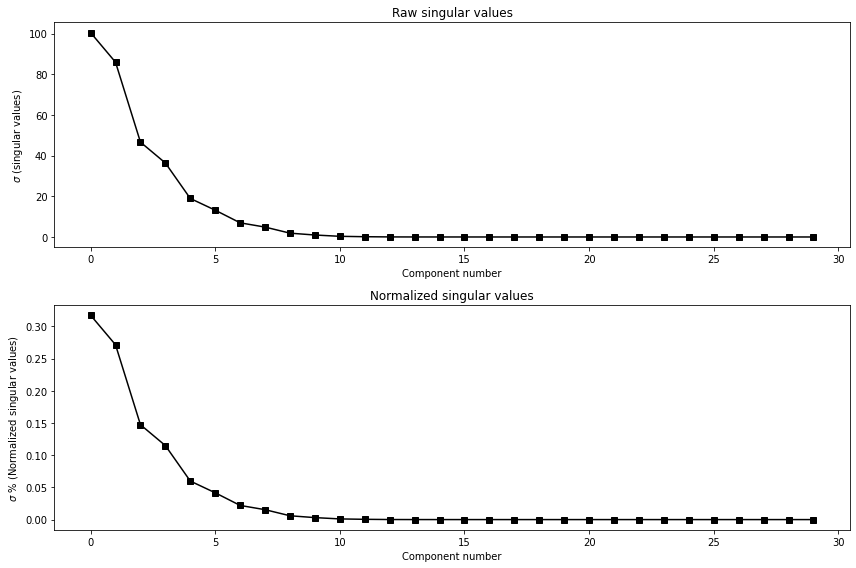

In [54]:
np.random.seed(2)

# Make a give matrix by smooth noise image
m = 40
n = 30
# No need to care about the below math detail for SVD
k = int((m + n) / 4)
xx = np.linspace(-3, 3, k)
[X, Y] = np.meshgrid(xx, xx)
g2d = np.exp(-(X**2 + Y**2) / (k / 8))
A = scipy.signal.convolve2d(np.random.randn(m, n), g2d, 'same')

# SVD
U, S, V = np.linalg.svd(A)

# Normalize singular value
S_normalized = S / np.sum(S)

# Visualize
fig = plt.subplots(1, figsize=(12, 8))

plt.subplot(211)
plt.plot(S, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (singular values)')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(S_normalized, 'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ % (Normalized singular values)')
plt.title('Normalized singular values')

plt.tight_layout()
plt.show()

In [50]:
# From 156